In [1]:
# import packages
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# data load
df = pd.read_csv("../datasets/Sustainability Hackathon Dataset.csv")
df.rename(columns = {"Country Name":"country"}, inplace = True)
df.rename(columns = {"Year":"year"}, inplace = True)
df.rename(columns = {"GDP per capita (current US$) - NY.GDP.PCAP.CD":"gdp_per_capita"}, inplace = True)
df.rename(columns = {"GDP (current US$) - NY.GDP.MKTP.CD":"gdp"}, inplace = True)
df.shape

(3287, 54)

In [3]:
# check missing values
df['gdp_per_capita'].isnull().values.any()

True

In [4]:
df['gdp'].isnull().values.any()

True

In [5]:
# % of missing.
import numpy as np
for col in df.columns:
    if col == 'gdp_per_capita':                
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
    if col == 'gdp':                
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

gdp - 1%
gdp_per_capita - 1%


In [6]:
# replace missing values with the median because of GDP per capita columns is numeric
med_gdp_per = df['gdp_per_capita'].median()
print(med_gdp_per)
df['gdp_per_capita'] = df['gdp_per_capita'].fillna(med_gdp_per)

4335.7090069999995


In [7]:
# replace missing values with the median because of GDP columns is numeric
med = df['gdp'].median()
print(med)
df['gdp'] = df['gdp'].fillna(med)

24978856713.5


In [8]:
# check missing values
df['gdp_per_capita'].isnull().values.any()

False

In [9]:
df['gdp'].isnull().values.any()

False

In [10]:
# filter data upon 4 countries
countries_to_keep = ['United States', 'China', 'India', 'Ethiopia']
columns = ['country', 'year', 'gdp_per_capita', 'gdp']
df_gdp = df[df['country'].isin(countries_to_keep)][columns]
gdp_per_col = 'GDP per capita(current US$)'
gdp_col = 'GDP(current US$)'
df_gdp.head

<bound method NDFrame.head of             country  year  gdp_per_capita           gdp
589           China  2000      959.372484  1.211350e+12
590           China  2001     1053.108243  1.339400e+12
591           China  2002     1148.508290  1.470550e+12
592           China  2003     1288.643252  1.660290e+12
593           China  2004     1508.668098  1.955350e+12
...             ...   ...             ...           ...
3130  United States  2014    55049.988330  1.752720e+13
3131  United States  2015    56863.371500  1.823830e+13
3132  United States  2016    58021.400500  1.874510e+13
3133  United States  2017    60109.655730  1.954300e+13
3134  United States  2018    63064.418410  2.061190e+13

[76 rows x 4 columns]>

In [11]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 589 to 3134
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         76 non-null     object 
 1   year            76 non-null     int64  
 2   gdp_per_capita  76 non-null     float64
 3   gdp             76 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ KB


In [12]:
df_gdp.to_csv("df_gdp_truecue.csv", index= False)

<AxesSubplot:>

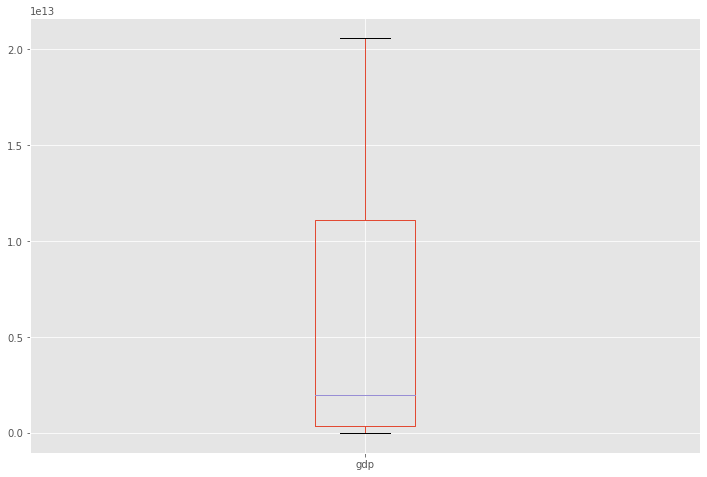

In [13]:
# box plot.
df_gdp.boxplot(column=['gdp'])

<AxesSubplot:xlabel='country', ylabel='gdp'>

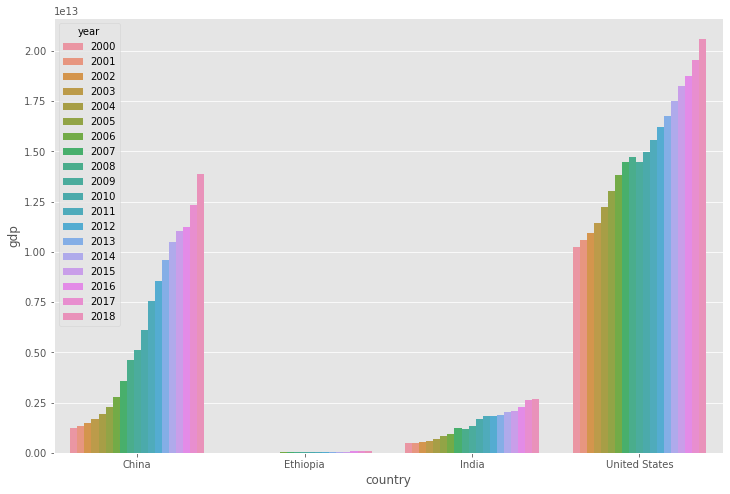

In [14]:
# bar chart
sns.barplot(x='country', y= 'gdp', data=df_gdp, hue='year')

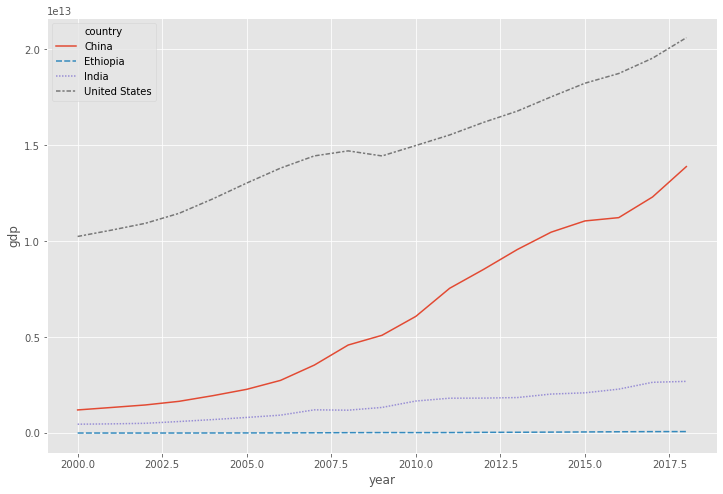

In [15]:
sns.lineplot(x = "year", y='gdp', hue='country', style="country", data = df_gdp)
plt.show()